In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')

In [2]:
# setting

start = '1980'
end = '2023'
symbol = 'AAPL'

In [3]:
# load data

data = pd.read_csv(f"Data/DWJ_download/{symbol}.csv", index_col = 0)
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099192,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094017,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087117,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089273,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091861,73449600


In [4]:
data.index

Index(['1980-12-12', '1980-12-15', '1980-12-16', '1980-12-17', '1980-12-18',
       '1980-12-19', '1980-12-22', '1980-12-23', '1980-12-24', '1980-12-26',
       ...
       '2024-02-06', '2024-02-07', '2024-02-08', '2024-02-09', '2024-02-12',
       '2024-02-13', '2024-02-14', '2024-02-15', '2024-02-16', '2024-02-20'],
      dtype='object', name='Date', length=10887)

In [5]:
# set index data type from object to datetime

data.set_index(pd.to_datetime(data.index), inplace = True)
data = data[start:end]
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099192,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094017,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087117,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089273,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091861,73449600


In [6]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.353287,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.803986,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.903839,48087700
2023-12-28,194.139999,194.660004,193.169998,193.580002,193.333298,34049900
2023-12-29,193.899994,194.399994,191.729996,192.529999,192.284637,42628800


In [7]:
# rescale data from daily to monthly

data = data.resample('M').last() # last is the last date of each month
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-31,0.152902,0.152902,0.152344,0.152344,0.117737,35750400
1981-01-31,0.127232,0.127232,0.126116,0.126116,0.097467,46188800
1981-02-28,0.118304,0.119420,0.118304,0.118304,0.091430,14761600
1981-03-31,0.110491,0.110491,0.109375,0.109375,0.084529,15993600
1981-04-30,0.126674,0.127790,0.126674,0.126674,0.097898,12611200
...,...,...,...,...,...,...
2023-08-31,187.839996,189.119995,187.479996,187.869995,187.383713,60794500
2023-09-30,172.020004,173.070007,170.339996,171.210007,170.766830,51814200
2023-10-31,169.350006,170.899994,167.899994,170.770004,170.327972,44846000


In [8]:
# rename a column

data.rename(columns = {'Adj Close': 'price'}, inplace = True)
data

,Open,High,Low,Close,price,Volume
Date,,,,,,
1980-12-31,0.152902,0.152902,0.152344,0.152344,0.117737,35750400
1981-01-31,0.127232,0.127232,0.126116,0.126116,0.097467,46188800
1981-02-28,0.118304,0.119420,0.118304,0.118304,0.091430,14761600
1981-03-31,0.110491,0.110491,0.109375,0.109375,0.084529,15993600
1981-04-30,0.126674,0.127790,0.126674,0.126674,0.097898,12611200
...,...,...,...,...,...,...
2023-08-31,187.839996,189.119995,187.479996,187.869995,187.383713,60794500
2023-09-30,172.020004,173.070007,170.339996,171.210007,170.766830,51814200
2023-10-31,169.350006,170.899994,167.899994,170.770004,170.327972,44846000


In [9]:
# get a column to study

df = data['price']
df.head()

Date
1980-12-31    0.117737
1981-01-31    0.097467
1981-02-28    0.091430
1981-03-31    0.084529
1981-04-30    0.097898
Freq: M, Name: price, dtype: float64

In [10]:
df.tail()

Date
2023-08-31    187.383713
2023-09-30    170.766830
2023-10-31    170.327972
2023-11-30    189.707916
2023-12-31    192.284637
Freq: M, Name: price, dtype: float64

In [11]:
data.shape

(517, 6)

### ARIMA (p, d, q)
It is the combination of autoregressive, integration, and moving average

- AR autoregressive: relationship between observation and lagged observation คือความสัมพันธ์ของตัวมันกับตัวมันเองในอดีต เช่น t-4 ก็คือการหา model ความสัมพันธ์ของราคาในปัจจุบันด้วย model ย้อนหลังไป 4 วัน แต่ละวันก็มี Coeficient ต่างกันนะ
- l integration: Integration, to differencing to make data stationary ตัวนี้จะไม่เจอในสมการข้างล่างนะ เพราะมันคือ parameter ของกระบวนการ integration ที่เอา data ไป diff เช่น diff 2 ครั้ง d = 2
- MA moving average: sependency between an observation and residual from moving average to lagged observations คือ MA error นั่นเอง 

<img src='Pics/arima.png'>

- <font color = 'green'>**ARIMA (0, 0, 0)**</font>: White noise
- <font color = 'green'>**ARIMA (0, 1, 0)**</font>: d = 1 Random walk
- <font color = 'green'>**ARIMA (p, 0, q)**</font>: ARIMA(p, q)
- <font color = 'green'>**ARIMA (p, 0, 0)**</font>: AR(p) model
- <font color = 'green'>**ARIMA (0, 0, q)**</font>: MA(q) model

In [12]:
df_diff = df.diff()
df_diff

Date
1980-12-31          NaN
1981-01-31    -0.020270
1981-02-28    -0.006037
1981-03-31    -0.006901
1981-04-30     0.013369
                ...    
2023-08-31    -8.293549
2023-09-30   -16.616882
2023-10-31    -0.438858
2023-11-30    19.379944
2023-12-31     2.576721
Freq: M, Name: price, Length: 517, dtype: float64

In [13]:
df_diff = df_diff.dropna()
df_diff

Date
1981-01-31    -0.020270
1981-02-28    -0.006037
1981-03-31    -0.006901
1981-04-30     0.013369
1981-05-31     0.016388
                ...    
2023-08-31    -8.293549
2023-09-30   -16.616882
2023-10-31    -0.438858
2023-11-30    19.379944
2023-12-31     2.576721
Freq: M, Name: price, Length: 516, dtype: float64

<AxesSubplot: title={'center': 'AAPL Price'}, xlabel='Date'>

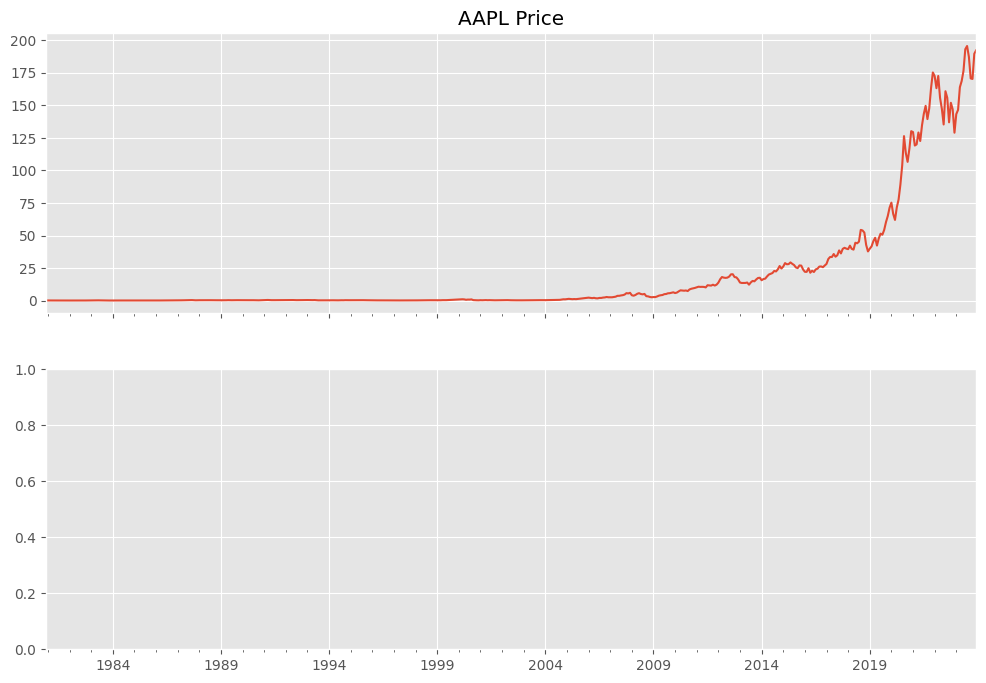

In [14]:
# plot 

plt.rcParams['figure.figsize'] = (12.0, 8.0)

fig, ax = plt.subplots(2, sharex = True)
df.plot(title = f"{symbol} Price", ax = ax[0])

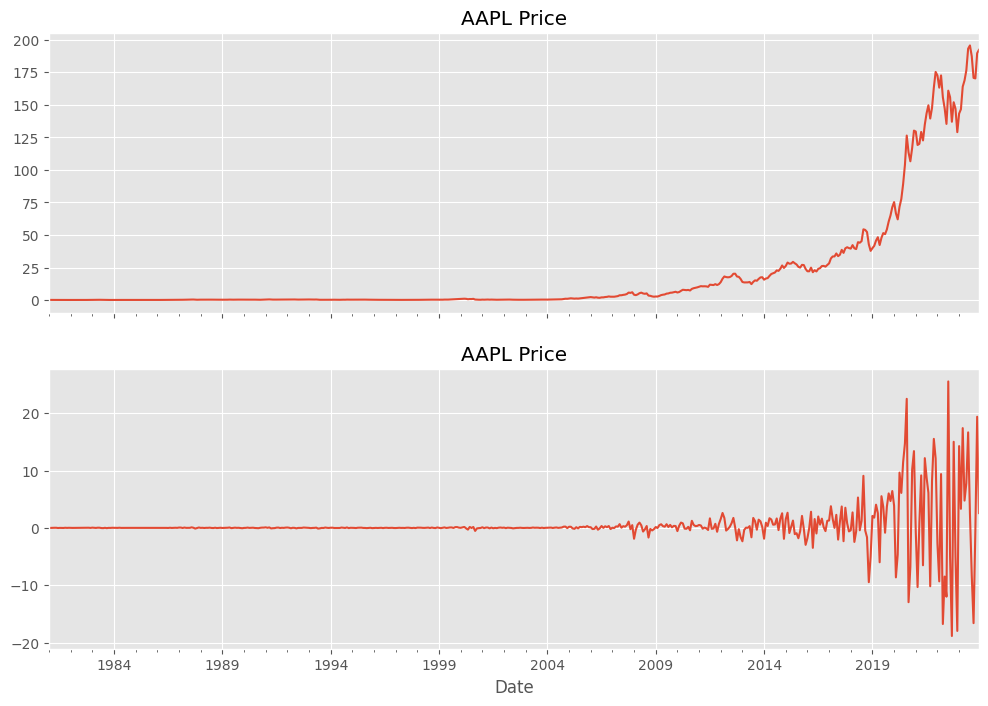

In [15]:
plt.rcParams['figure.figsize'] = (12.0, 8.0)

fig, ax = plt.subplots(2, sharex = True)
df.plot(title = f"{symbol} Price", ax = ax[0])
df_diff.plot(title = f"{symbol} Price", ax = ax[1]) # for diff and dropna data
plt.show()

In [16]:
df

Date
1980-12-31      0.117737
1981-01-31      0.097467
1981-02-28      0.091430
1981-03-31      0.084529
1981-04-30      0.097898
                 ...    
2023-08-31    187.383713
2023-09-30    170.766830
2023-10-31    170.327972
2023-11-30    189.707916
2023-12-31    192.284637
Freq: M, Name: price, Length: 517, dtype: float64

In [17]:
df_train = df[:'2018']
df_train

Date
1980-12-31     0.117737
1981-01-31     0.097467
1981-02-28     0.091430
1981-03-31     0.084529
1981-04-30     0.097898
                ...    
2018-08-31    54.361153
2018-09-30    53.909805
2018-10-31    52.266762
2018-11-30    42.796154
2018-12-31    37.801907
Freq: M, Name: price, Length: 457, dtype: float64

In [18]:
df_test = df['2019':]
df_test

Date
2019-01-31     39.886837
2019-02-28     41.672832
2019-03-31     45.716167
2019-04-30     48.296200
2019-05-31     42.297192
2019-06-30     47.817776
2019-07-31     51.470791
2019-08-31     50.623528
2019-09-30     54.317093
2019-10-31     60.329151
2019-11-30     65.007927
2019-12-31     71.429665
2020-01-31     75.287575
2020-02-29     66.651978
2020-03-31     62.002243
2020-04-30     71.635742
2020-05-31     77.731560
2020-06-30     89.188095
2020-07-31    103.915894
2020-08-31    126.420853
2020-09-30    113.459404
2020-10-31    106.650459
2020-11-30    116.834885
2020-12-31    130.221085
2021-01-31    129.504684
2021-02-28    119.181572
2021-03-31    120.056320
2021-04-30    129.206726
2021-05-31    122.682182
2021-06-30    134.841125
2021-07-31    143.603409
2021-08-31    149.705017
2021-09-30    139.519577
2021-10-31    147.703461
2021-11-30    163.224396
2021-12-31    175.340332
2022-01-31    172.585342
2022-02-28    163.254379
2022-03-31    172.637146
2022-04-30    155.86

In [19]:
# import a model

from statsmodels.tsa.stattools import adfuller

In [20]:
# crate a function to track above label 

def adftest(data):

    data = data.copy()

    index = ['adf statistic', 'p_value', 'lag', 'observation']
    result = adfuller(data, autolag = 'AIC')

    adf = pd.Series(result[0:4], index = index)

    if adf[1] > 0.05:
        print('Data is not stationary')
    elif adf[1] < 0.05:
        print('Data is stationary!')
        
    for key, val in result[4].items():
        adf[f'Critical value ({key})'] = val
        
    return adf

In [21]:
# call a function adftest

adftest(df.diff().dropna()) # test by using ADF

Data is not stationary


adf statistic            -2.798317
p_value                   0.058515
lag                      19.000000
observation             496.000000
Critical value (1%)      -3.443603
Critical value (5%)      -2.867385
Critical value (10%)     -2.569883
dtype: float64

In [22]:
adftest(df_train.diff().dropna()) # very small p-value

Data is stationary!


adf statistic            -4.092215
p_value                   0.000998
lag                      18.000000
observation             437.000000
Critical value (1%)      -3.445403
Critical value (5%)      -2.868177
Critical value (10%)     -2.570305
dtype: float64

In [23]:
# import a library

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

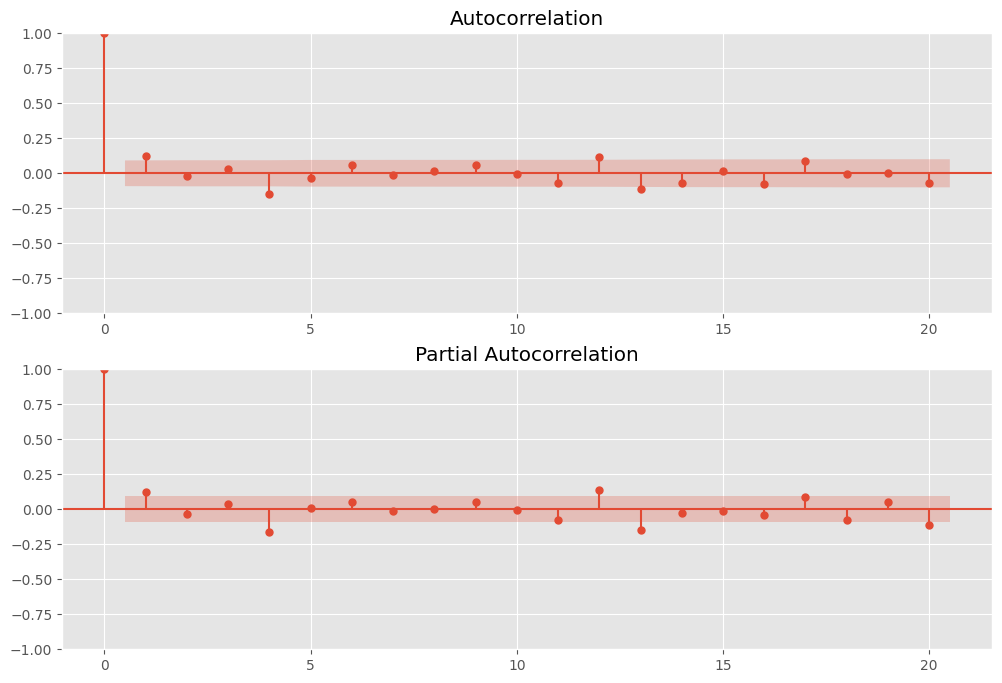

In [24]:
n_lag = 20
sig_lv = 0.05

fig, ax = plt.subplots(2, 1)
plot_acf(df_train.diff().dropna(), ax = ax[0], lags = n_lag, alpha = sig_lv)
plot_pacf(df_train.diff().dropna(), ax = ax[1], lags = n_lag, alpha = sig_lv)
plt.show()

### Apply model

In [25]:
# import a model

from statsmodels.tsa.arima_model import ARIMA

In [26]:
model = ARIMA(df_train, order = (4, 1, 1)).fit()
model.summary()

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [27]:
import statsmodels.api as sm

In [28]:
model = sm.tsa.arima.ARIMA(df_train, order = (4, 1, 1)).fit() # 4 bcs in day 4 seems to be a relation 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  price   No. Observations:                  457
Model:                 ARIMA(4, 1, 1)   Log Likelihood                -637.883
Date:                Thu, 21 Mar 2024   AIC                           1287.767
Time:                        21:03:16   BIC                           1312.502
Sample:                    12-31-1980   HQIC                          1297.510
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1989      0.187      1.066      0.287      -0.167       0.565
ar.L2         -0.0289      0.038     -0.770      0.441      -0.103       0.045
ar.L3          0.0579      0.010      5.672      0.000       0.038       0.078
ar.L4         -0.1921      0.032     -5.974      0.000      -0.255      -0.129
ma.L1         -0.0527      0.185     -0.284      0.776      -0.416       0.311
sigma2         0.9603      0.018     52.912      0.000       0.925       0.996
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):             23338.95
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):            2687.06   Skew:                            -0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        38.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                  457
Model:                 ARIMA(4, 1, 1)   Log Likelihood                -637.883
Date:                Thu, 21 Mar 2024   AIC                           1287.767
Time:                        21:03:17   BIC                           1312.502
Sample:                    12-31-1980   HQIC                          1297.510
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1989      0.187      1.066      0.287      -0.167       0.565
ar.L2         -0.0289      0.038     -0.770      0.441      -0.103       0.045
ar.L3          0.0579      0.010      5.672      0.0

In [30]:
np.mean(model.resid)

0.08829500909761202

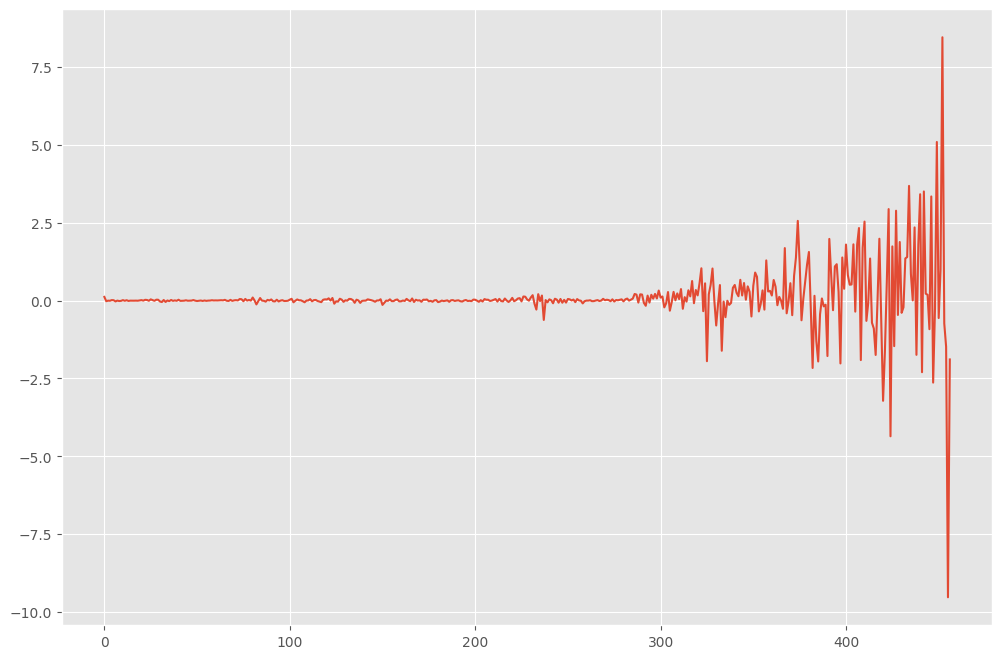

In [31]:
sns.lineplot(x = np.arange(len(model.resid)), y = model.resid);

### Predict

In [32]:
pred = model.forecast(len(df_test))
pred

2019-01-31    37.173781
2019-02-28    36.960947
2019-03-31    38.467395
2019-04-30    39.696477
2019-05-31    40.005757
2019-06-30    40.159790
2019-07-31    39.963171
2019-08-31    39.701345
2019-09-30    39.604438
2019-10-31    39.551763
2019-11-30    39.566713
2019-12-31    39.615910
2020-01-31    39.640835
2020-02-29    39.655356
2020-03-31    39.657498
2020-04-30    39.649494
2020-05-31    39.643891
2020-06-30    39.640342
2020-07-31    39.638924
2020-08-31    39.639958
2020-09-30    39.641076
2020-10-31    39.641868
2020-11-30    39.642326
2020-12-31    39.642260
2021-01-31    39.642064
2021-02-28    39.641902
2021-03-31    39.641783
2021-04-30    39.641766
2021-05-31    39.641794
2021-06-30    39.641824
2021-07-31    39.641851
2021-08-31    39.641861
2021-09-30    39.641858
2021-10-31    39.641853
2021-11-30    39.641848
2021-12-31    39.641845
2022-01-31    39.641844
2022-02-28    39.641845
2022-03-31    39.641846
2022-04-30    39.641847
2022-05-31    39.641847
2022-06-30    39

### Auto ARIMA

- It is a model to provide p, d, q that we don't require to defime by ourself

# instal a model

pip install pmdarima
![Screenshot 2567-03-21 at 20.57.39.png](<attachment:Screenshot 2567-03-21 at 20.57.39.png>)
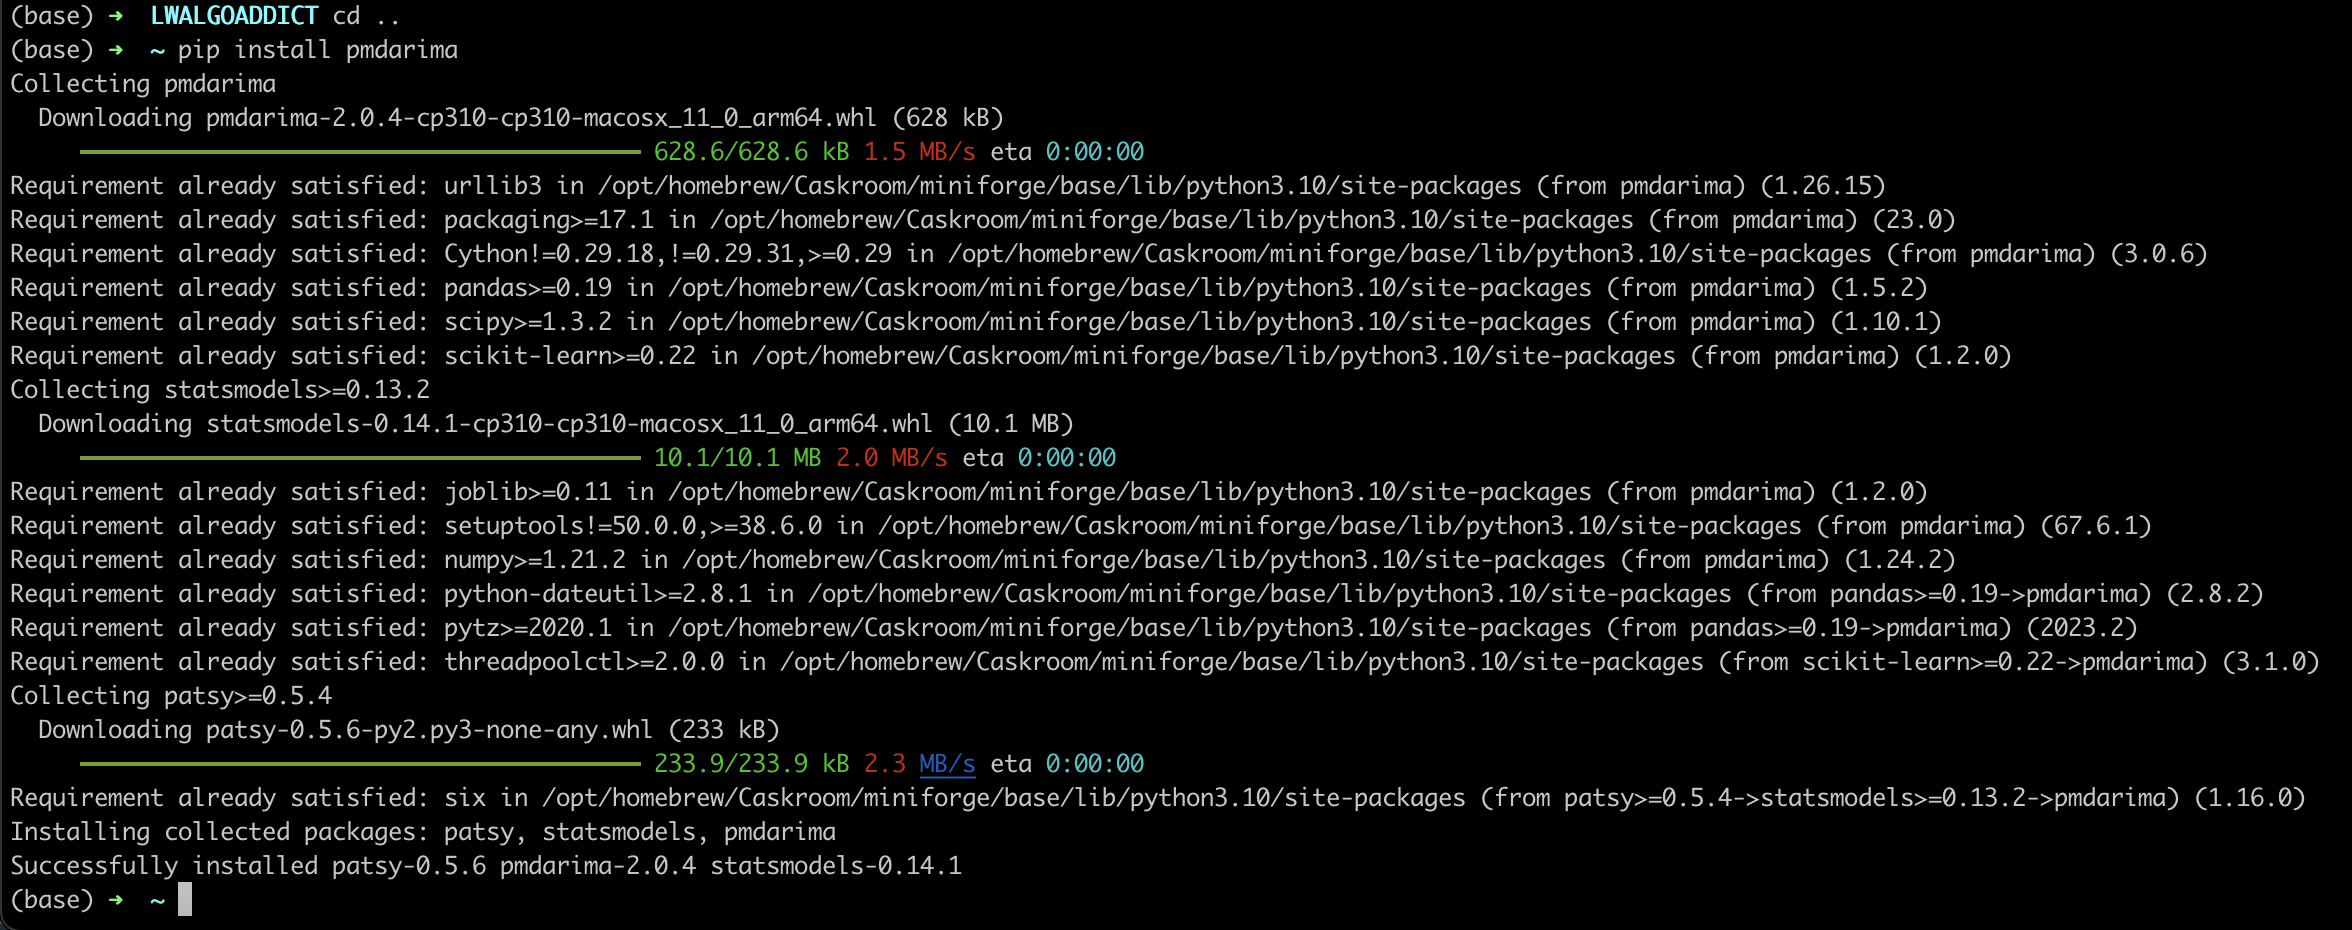

In [33]:
import pmdarima as pm

ModuleNotFoundError: No module named 'pmdarima'